In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 5.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 76.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

In [36]:
df = pd.read_csv('data/!Shared себестоимость - Себестоимость.csv')

In [37]:
df.shape

(89, 364)

In [38]:
df.head()

,product_id,default,январь,февраль,март,апрель,май,июнь,июль,август,...,06.12.2024,07.12.2024,08.12.2024,09.12.2024,10.12.2024,11.12.2024,12.12.2024,13.12.2024,14.12.2024,15.12.2024
0,DRL2-1,"1 321,64",-,-,"1 367,86","1 367,86","1 381,54","1 381,54","1 321,49","1 321,49",...,"1508,680037","1477,614077","1508,680037","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077"
1,DRL3-1,"634,37",-,-,"628,09","628,09","634,37","634,37","634,37","634,37",...,"628,092","652,8823002","628,092","628,092","628,092","628,092","628,092","628,092","628,092","628,092"
2,DRL4-1,"1 548,81",-,-,"1 487,52","1 487,52","1 502,40","1 502,40","1 548,82","1 548,82",...,"1746,430025","1710,873125","1746,430025","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125"
3,DRL5-1,"1 741,02",-,-,"1 744,38","1 744,38","1 761,82","1 761,82","1 740,93","1 740,93",...,"1972,933621","1932,143396","1972,933621","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396"
4,B-FCM1-1BK,"459,89","446,69","446,69","446,69","446,69","451,16","451,16","459,89","459,89",...,"446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69"


In [39]:
df_raw_cost = pd.read_csv('data/!Shared себестоимость - Сырая себестоимость.csv')

In [40]:
from datetime import datetime, timedelta

start_date = datetime.strptime("26.11.2024", "%d.%m.%Y")
end_date = datetime.now()

date_list = [(start_date + timedelta(days=i)).strftime("%d.%m.%Y") 
             for i in range((end_date - start_date).days + 1)]

In [41]:
date_list_raw_cost = [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") 
                     for i in range((end_date - start_date).days + 1)]

In [42]:
df.columns

Index([' product_id', ' default', 'январь', 'февраль', 'март', 'апрель', 'май',
       'июнь', 'июль', 'август',
       ...
       '06.12.2024', '07.12.2024', '08.12.2024', '09.12.2024', '10.12.2024',
       '11.12.2024', '12.12.2024', '13.12.2024', '14.12.2024', '15.12.2024'],
      dtype='object', length=364)

In [43]:
df.loc[(df[' product_id'] == ' CPT1-1-1MGR').index, date_list] = df_raw_cost.loc[(df[' product_id'] == ' CPT1-1-1MGR').index[0], date_list_raw_cost].tolist()

In [44]:
df[df[' product_id'] == ' CPT1-1-1MGR'][date_list]

,26.11.2024,27.11.2024,28.11.2024,29.11.2024,30.11.2024,01.12.2024,02.12.2024,03.12.2024,04.12.2024,05.12.2024,06.12.2024,07.12.2024,08.12.2024,09.12.2024,10.12.2024,11.12.2024,12.12.2024,13.12.2024,14.12.2024,15.12.2024
15,"1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1508,68","1508,680037","1477,614077","1508,680037","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077"


# Качество данных
Высокий приоритет
- [x] Проверить что есть столбцы со всеми днями и что есть хотя бы какие-то данные в эти дни
- [x] Проверить что с января по 25 ноября включительно данные полностью идентичны внутри месяца
- [x] Построить статистику какие есть пропуски в данных

Низкий приоритет
- [x] Проверить что среднее по дням совпадает со средним по месяцам

# Предсказательные модели
- [ ] Погуглить и изучить как работают с предсказанием подобных данных
- [ ] Сравнить график себестоимости с графиков курсов валют, посчитать корреляции
- [ ] Попробовать извлечь сезонность

In [48]:
start_date = datetime.strptime("01.01.2024", "%d.%m.%Y")
end_date = datetime.now()

all_date_list = [(start_date + timedelta(days=i)).strftime("%d.%m.%Y") 
             for i in range((end_date - start_date).days + 1)]

In [50]:
df.columns[~df.columns.isin(all_date_list)]

Index([' product_id', ' default', 'январь', 'февраль', 'март', 'апрель', 'май',
       'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь'],
      dtype='object')

In [142]:
import numpy as np

days_in_month = {
    'январь': 31,
    'февраль': 28,
    'март': 31,
    'апрель': 30,
    'май': 31,
    'июнь': 30,
    'июль': 31,
    'август': 31,
    'сентябрь': 30,
    'октябрь': 31,
    'ноябрь': 30,
    'декабрь': 31
}

def map_price(value):
    if value == '-' or type(value) != str:
        return np.nan
    return float(value.replace(' ', '').replace('\xa0', '').replace(',', '.'))

In [141]:
for index, row in df.iterrows():
    for i, (month, days) in enumerate(days_in_month.items()):

        start_date = datetime.strptime(f"01.{i + 1}.2024", "%d.%m.%Y")
        dates_for_check = [start_date + timedelta(days=i) for i in range(days)]
        end_date = datetime.strptime(f"25.11.2024", "%d.%m.%Y")
        dates_for_check = [date for date in dates_for_check if date <= end_date]
        
        month_date_list = [date.strftime("%d.%m.%Y") for date in dates_for_check]
        daily_values = row[month_date_list]

        if daily_values.nunique() != 1:
            unique_diffs = daily_values.map(map_price).sort_values().diff()[1:].round(3).unique()
            if [diff for diff in unique_diffs if diff not in [0., 1000.]] == []:
                continue
            print(f"Артикул {row[' product_id']}, месяц {month}, {daily_values.unique()}")
            break
    break

In [155]:
for index, row in df.iterrows():
    for i, (month, days) in enumerate(days_in_month.items()):

        start_date = datetime.strptime(f"01.{i + 1}.2024", "%d.%m.%Y")
        dates_for_check = [start_date + timedelta(days=i) for i in range(days)]
        end_date = datetime.now()
        dates_for_check = [date for date in dates_for_check if date <= end_date]
        
        month_date_list = [date.strftime("%d.%m.%Y") for date in dates_for_check]

        daily_values = row[month_date_list].map(map_price)
        if daily_values.nunique() != 1:
            unique_diffs = daily_values.sort_values().diff()[1:].round(3).unique()
            if [diff for diff in unique_diffs if diff not in [0., 1000.]] == []:
                end_date = datetime.strptime(f"25.11.2024", "%d.%m.%Y")
                month_date_list_before_end = [date.strftime("%d.%m.%Y") for date in dates_for_check if date <= end_date]
                month_date_list_after_end = [date.strftime("%d.%m.%Y") for date in dates_for_check if date > end_date]
                daily_values = [row[month_date_list_before_end].map(map_price).min()] * len(month_date_list_before_end)
                daily_values += row[month_date_list_after_end].map(map_price).tolist()

        daily_average = map_price(row[month])
        if not np.isclose(np.mean(daily_values), daily_average, equal_nan=True):
            print(f"Артикул {row[' product_id']}, месяц {month}, {np.mean(daily_values)} != {daily_average}")

Артикул  DRL2-1, месяц май, 381.54000000000025 != 1381.54
Артикул  DRL2-1, месяц ноябрь, 1353.78 != 1322.8
Артикул  DRL2-1, месяц декабрь, 1492.1115126666662 != 0.0
Артикул  DRL3-1, месяц ноябрь, 780.0883333333334 != 634.37
Артикул  DRL3-1, месяц декабрь, 1492.1115126666662 != 634.37
Артикул  DRL4-1, месяц май, 502.39999999999986 != 1502.4
Артикул  DRL4-1, месяц ноябрь, 1542.28 != 1549.0
Артикул  DRL4-1, месяц декабрь, 1492.1115126666662 != 0.0
Артикул  DRL5-1, месяц май, 761.8199999999999 != 1761.82
Артикул  DRL5-1, месяц ноябрь, 1701.8716666666667 != 1740.51
Артикул  DRL5-1, месяц декабрь, 1492.1115126666662 != 0.0
Артикул  B-FCM1-1BK, месяц ноябрь, 634.6883333333334 != 459.89
Артикул  B-FCM1-1BK, месяц декабрь, 1492.1115126666662 != 0.0
Артикул  B-FCM1-1WT, месяц ноябрь, 638.1383333333334 != 464.03
Артикул  B-FCM1-1WT, месяц декабрь, 1492.1115126666662 != 464.03
Артикул  AT-003W, месяц ноябрь, 1069.2466666666667 != 981.36
Артикул  AT-003W, месяц декабрь, 1492.1115126666662 != 0.0
Ар

- до 25.11.2024 включительно нужно брать дату за месяц
- если значение за месяц nan или 0.0, то брать минимальное
    - я такое обнаружил для июля для одно записи и двух записей октября, возможно нужно сначала сравниться с другой таблицей
- обнаружил странность для октября для одной записи  HNG1-1W, узнаю про нее

In [181]:
df_month_only = pd.read_csv('data/Себес - Выгрузка себестоимости (пользуемся).csv', header=1)

In [182]:
df_month_only

,АртикулЖ,ТЕКУЩИЙ месяц,ШК,Наименование,янв,фев,мар,апр,май,июнь,...,октябрь,Ноябрь,дек,изменение нояб к окт,изменение декабря к нояб,тотал 2 месяца,Сервер СЕБЕС,АртикулЖ.1,ЦенаСВ,Unnamed: 22
0,DRL2-1,#REF!,4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 367,86","1 367,86","1 381,54","1 381,54",...,"1 321,64","1 322,80","1 323,56","-0,09%","-0,06%","-0,15%","р.1 508,68",CPT1-1MGR,"р.800,34",#REF!
1,DRL3-1,#REF!,4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"628,09","628,09","634,37","634,37",...,"634,37","634,37","634,37","0,00%","0,00%","0,00%","р.652,88",CPT1-1MBE,"р.763,97",#REF!
2,DRL4-1,#REF!,4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 487,52","1 487,52","1 502,40","1 502,40",...,"1 548,81","1 549,00","1 549,00","-0,01%","0,00%","-0,01%","р.1 746,43",CPT1-1BE,"р.652,46",#REF!
3,DRL5-1,#REF!,4.673738e+12,Аккумуляторная ударная дрель-шуруповер,-,-,"1 744,38","1 744,38","1 761,82","1 761,82",...,"1 741,02","1 740,51","1 740,51","0,03%","0,00%","0,03%","р.1 972,93",CPT1-1GR,"р.651,45",#REF!
4,B-FCM1-1BK,#REF!,4.673738e+12,Аппарат для чистки лица B-FCM1-1BK,"446,69","446,69","446,69","446,69","451,16","451,16",...,"459,89","459,89","0,00","0,00%","0,00%","0,00%","р.446,69",H-GFC2-1,"р.537,32",#REF!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYWR1-1,"р.3 082,52",NaN
1933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H-DSP1-1,"р.1 327,14",NaN
1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DYDB1-1,"р.1 967,48",NaN
1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM1-1WT,"р.1 434,81",NaN


In [183]:
df_month_only.columns

Index(['АртикулЖ', 'ТЕКУЩИЙ месяц', 'ШК', 'Наименование', 'янв', 'фев', 'мар',
       'апр', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'Ноябрь',
       'дек', 'изменение нояб к окт', 'изменение декабря к нояб',
       'тотал 2 месяца', 'Сервер СЕБЕС', 'АртикулЖ.1', 'ЦенаСВ',
       'Unnamed: 22'],
      dtype='object')

In [184]:
df_month_only = df_month_only.rename({'АртикулЖ': ' product_id', 'янв': 'январь', 'фев': 'февраль', 'мар': 'март', 'апр': 'апрель',
                      'Ноябрь': 'ноябрь', 'дек': 'декабрь'}, axis=1)

In [195]:
df_month_only_for_compare = df_month_only[[' product_id'] + list(days_in_month.keys())]
df_month_only_for_compare = df_month_only_for_compare[df_month_only_for_compare[' product_id'].notna()]
df_month_only_for_compare = df_month_only_for_compare.set_index(' product_id')

In [196]:
df_month_only_for_compare.shape

(108, 12)

In [197]:
df_month_only_for_compare

,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь
product_id,,,,,,,,,,,,
DRL2-1,-,-,"1 367,86","1 367,86","1 381,54","1 381,54","1 333,36","1 321,49","1 321,64","1 321,64","1 322,80","1 323,56"
DRL3-1,-,-,"628,09","628,09","634,37","634,37","0,00","634,37","634,37","634,37","634,37","634,37"
DRL4-1,-,-,"1 487,52","1 487,52","1 502,40","1 502,40","1 564,49","1 548,82","1 548,81","1 548,81","1 549,00","1 549,00"
DRL5-1,-,-,"1 744,38","1 744,38","1 761,82","1 761,82","1 757,91","1 740,93","1 741,02","1 741,02","1 740,51","1 740,51"
B-FCM1-1BK,"446,69","446,69","446,69","446,69","451,16","451,16","0,00","459,89","459,89","459,89","459,89","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...
H-MOP2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H-MOP3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NHD1-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
df = pd.read_csv('data/!Shared себестоимость - Себестоимость.csv')

In [300]:
df_for_compare = df[[' product_id'] + list(days_in_month.keys())]
df_for_compare = df_for_compare[df_for_compare[' product_id'].notna()]
df_for_compare = df_for_compare.set_index(' product_id')

In [301]:
df_for_compare.shape

(88, 12)

In [304]:
df_for_compare.index.nunique()

88

In [305]:
column_mapper = {' CPT1-1-1MGR': ' CPT1-1MGR', ' FP1-2': 'FP1-2', ' HNG1-1W': 'HNG1-1W'}

columns_for_compare = list(set(df_for_compare.columns) - set(['декабрь', 'ноябрь', ' product_id']))

for product_id in df_for_compare.index:
    df_for_compare_row = df_for_compare.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    df_month_only_for_compare_rows = df_month_only_for_compare.loc[df_month_only_for_compare_column] 
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare]
    df_base_subrow = df_for_compare_row[columns_for_compare]
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        print(product_id, compare_result.all())
    else:
        print(product_id, compare_result.all(axis=1).any())

 DRL2-1 False
 DRL3-1 False
 DRL4-1 False
 DRL5-1 False
 B-FCM1-1BK False
 B-FCM1-1WT False
 AT-003W False
 AT-003BK False
 HNG1-1BK False
 WR1-2 False
 DYWR1-1 False
 H-DSP1-1 False
 DYDB1-1 False
 TM1-1WT False
 TM1-1BK False
 CPT1-1-1MGR False
 CPT1-1MBE False
 H-CPT2-1CA False
 CPT1-1BE False
 CPT1-1GR False
 H-GFC2-1 False
 H-GFC1-2 False
 H-GFC1-3 False
 H-LB1-1GR False
 H-LB1-1WT False
 AT-001W False
 AT-002G False
 K-EBR-1-1 False
 TVB1-1 False
 TVB1-2 False
 B-DRS1-1 False
 B-MG1-1 False
 B-MCM1-1 False
 H-TC1-2WT False
 H-TC1-3WT False
 H-TC1-4WT False
 H-TC1-5WT False
 H-TC1-1WT False
 H-SJ1-1 False
 H-ORG1-2 False
 H-ORG1-3 False
 H-ORG1-1 False
 K-PMC1-1 False
 PT1-7 False
 PT2-3GN False
 PT1-3 False
 PT1-2 False
 PT1-5 False
 PT2-1RD False
 PT2-2GR False
 PT1-6 False
 PT1-1 False
 PT1-4 False
 H-GFC1-1 False
 HL1-1 False
 H-BOWL1-2 False
 H-BOWL1-2C False
 H-LED-1-1-15 False
 SHC1-1GR False
 SHC1-1BK False
 SHC1-1BR False
 GR1-2 False
 DYGR1-1 False
 PHA1-1WT False
 PHA1-

- между двумя таблицами за месяца вообще нет совпадений
- если выкинуть октябрь и декабрь то полное совпадение только для H-MOP1-1

In [306]:
product_id

' HNG1-1W'

In [307]:
compare_result

апрель       True
март         True
октябрь     False
май          True
февраль      True
сентябрь    False
январь       True
июнь         True
июль        False
август      False
dtype: bool

In [308]:
df_month_only_for_compare_rows[columns_for_compare]

апрель      0,00
март        0,00
октябрь     0,00
май         0,00
февраль     0,00
сентябрь    0,00
январь      0,00
июнь        0,00
июль        0,00
август      0,00
Name: HNG1-1W, dtype: object

In [309]:
df_for_compare_row[columns_for_compare]

апрель               0,00
март                 0,00
октябрь       1 034,84   
май                  0,00
февраль              0,00
сентябрь      1 034,84   
январь               0,00
июнь                 0,00
июль          1 034,84   
август        1 034,84   
Name:  HNG1-1W, dtype: object

In [316]:
diffs = []

for product_id in df_for_compare.index:
    df_for_compare_row = df_for_compare.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    df_month_only_for_compare_rows = df_month_only_for_compare.loc[df_month_only_for_compare_column] 
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare]
    df_base_subrow = df_for_compare_row[columns_for_compare]
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        diffs.append((compare_result == False).sum())
    else:
        sub_diffs = (compare_result == False).sum(axis=1)
        unique_sub_diffs = np.unique(sub_diffs)
        if len(unique_sub_diffs) == 1:
            diffs.append(unique_sub_diffs[0])
        else:
            diffs.extend(unique_sub_diffs)

In [317]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


(array([ 1., 74.,  9.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

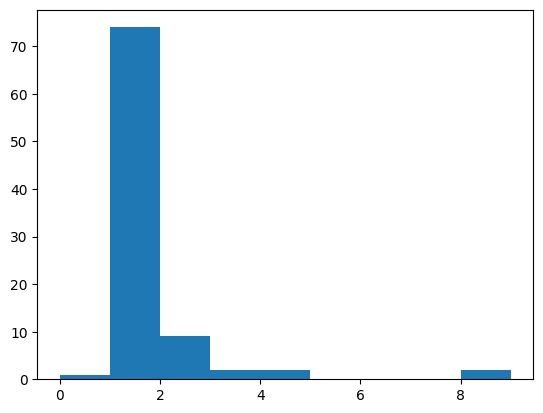

In [318]:
from matplotlib import pyplot as plt

plt.hist(diffs, bins=9)

In [319]:
diffs = []

for product_id in df_for_compare.index:
    df_for_compare_row = df_for_compare.loc[product_id]
    df_month_only_for_compare_column = column_mapper[product_id] if product_id in column_mapper else product_id
    df_month_only_for_compare_rows = df_month_only_for_compare.loc[df_month_only_for_compare_column] 
    
    df_for_compare_subrow = df_month_only_for_compare_rows[columns_for_compare]
    df_base_subrow = df_for_compare_row[columns_for_compare]
    compare_result = (df_for_compare_subrow == df_base_subrow) | (df_for_compare_subrow.isna() & df_base_subrow.isna())
    if len(df_month_only_for_compare_rows.shape) == 1:
        diffs.extend(zip(df_for_compare_subrow[compare_result == False], df_base_subrow[compare_result == False]))
    else:
        sub_diffs = (compare_result == False).sum(axis=1)
        unique_sub_diffs = np.unique(sub_diffs)
        # if len(unique_sub_diffs) == 1:
        #     diffs.append(unique_sub_diffs[0])
        # else:
        #     diffs.extend(unique_sub_diffs)

In [320]:
diffs

[('1\xa0333,36', '1\xa0321,49'),
 ('0,00', '634,37'),
 ('1\xa0564,49', '1\xa0548,82'),
 ('1\xa0757,91', '1\xa0740,93'),
 ('0,00', '459,89'),
 ('462,82', '464,03'),
 ('991,18', '981,36'),
 ('990,16', '980,35'),
 ('875,05', '872,36'),
 ('2\xa0055,83', '2\xa0035,47'),
 ('3\xa0171,71', '3\xa0148,42'),
 ('1\xa0376,00', '1\xa0267,65'),
 ('2\xa0026,71', '2\xa0009,37'),
 ('661,71', '656,74'),
 ('543,41', '535,66'),
 ('363,34', '354,59'),
 ('796,48', '764,75'),
 ('593,09', '575,89'),
 ('594,45', '636,79'),
 ('359,47', '355,91'),
 ('521,96', '501,67'),
 ('373,96', '396,80'),
 ('702,00', '709,02'),
 ('620,88', '596,07'),
 ('2\xa0203,79', '2\xa0171,14'),
 ('760,51', '752,63'),
 ('497,99', '488,70'),
 ('488,43', '478,63'),
 ('715,89', '711,79'),
 ('766,42', '763,89'),
 ('915,35', '793,23'),
 ('493,01', '471,66'),
 ('805,88', '799,16'),
 ('625,47', '590,76'),
 ('999,80', '998,67'),
 ('1\xa0564,86', '1\xa0512,61'),
 ('2\xa0111,73', '2\xa0071,26'),
 ('2\xa0118,67', '2\xa0081,42'),
 ('2\xa0133,31', '2\

In [321]:
pd.set_option('display.max_columns', None)

In [322]:
df.describe()

,product_id,default,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,01.01.2024,02.01.2024,03.01.2024,04.01.2024,05.01.2024,06.01.2024,07.01.2024,08.01.2024,09.01.2024,10.01.2024,11.01.2024,12.01.2024,13.01.2024,14.01.2024,15.01.2024,16.01.2024,17.01.2024,18.01.2024,19.01.2024,20.01.2024,21.01.2024,22.01.2024,23.01.2024,24.01.2024,25.01.2024,26.01.2024,27.01.2024,28.01.2024,29.01.2024,30.01.2024,31.01.2024,01.02.2024,02.02.2024,03.02.2024,04.02.2024,05.02.2024,06.02.2024,07.02.2024,08.02.2024,09.02.2024,10.02.2024,11.02.2024,12.02.2024,13.02.2024,14.02.2024,15.02.2024,16.02.2024,17.02.2024,18.02.2024,19.02.2024,20.02.2024,21.02.2024,22.02.2024,23.02.2024,24.02.2024,25.02.2024,26.02.2024,27.02.2024,28.02.2024,29.02.2024,01.03.2024,02.03.2024,03.03.2024,04.03.2024,05.03.2024,06.03.2024,07.03.2024,08.03.2024,09.03.2024,10.03.2024,11.03.2024,12.03.2024,13.03.2024,14.03.2024,15.03.2024,16.03.2024,17.03.2024,18.03.2024,19.03.2024,20.03.2024,21.03.2024,22.03.2024,23.03.2024,24.03.2024,25.03.2024,26.03.2024,27.03.2024,28.03.2024,29.03.2024,30.03.2024,31.03.2024,01.04.2024,02.04.2024,03.04.2024,04.04.2024,05.04.2024,06.04.2024,07.04.2024,08.04.2024,09.04.2024,10.04.2024,11.04.2024,12.04.2024,13.04.2024,14.04.2024,15.04.2024,16.04.2024,17.04.2024,18.04.2024,19.04.2024,20.04.2024,21.04.2024,22.04.2024,23.04.2024,24.04.2024,25.04.2024,26.04.2024,27.04.2024,28.04.2024,29.04.2024,30.04.2024,01.05.2024,02.05.2024,03.05.2024,04.05.2024,05.05.2024,06.05.2024,07.05.2024,08.05.2024,09.05.2024,10.05.2024,11.05.2024,12.05.2024,13.05.2024,14.05.2024,15.05.2024,16.05.2024,17.05.2024,18.05.2024,19.05.2024,20.05.2024,21.05.2024,22.05.2024,23.05.2024,24.05.2024,25.05.2024,26.05.2024,27.05.2024,28.05.2024,29.05.2024,30.05.2024,31.05.2024,01.06.2024,02.06.2024,03.06.2024,04.06.2024,05.06.2024,06.06.2024,07.06.2024,08.06.2024,09.06.2024,10.06.2024,11.06.2024,12.06.2024,13.06.2024,14.06.2024,15.06.2024,16.06.2024,17.06.2024,18.06.2024,19.06.2024,20.06.2024,21.06.2024,22.06.2024,23.06.2024,24.06.2024,25.06.2024,26.06.2024,27.06.2024,28.06.2024,29.06.2024,30.06.2024,01.07.2024,02.07.2024,03.07.2024,04.07.2024,05.07.2024,06.07.2024,07.07.2024,08.07.2024,09.07.2024,10.07.2024,11.07.2024,12.07.2024,13.07.2024,14.07.2024,15.07.2024,16.07.2024,17.07.2024,18.07.2024,19.07.2024,20.07.2024,21.07.2024,22.07.2024,23.07.2024,24.07.2024,25.07.2024,26.07.2024,27.07.2024,28.07.2024,29.07.2024,30.07.2024,31.07.2024,01.08.2024,02.08.2024,03.08.2024,04.08.2024,05.08.2024,06.08.2024,07.08.2024,08.08.2024,09.08.2024,10.08.2024,11.08.2024,12.08.2024,13.08.2024,14.08.2024,15.08.2024,16.08.2024,17.08.2024,18.08.2024,19.08.2024,20.08.2024,21.08.2024,22.08.2024,23.08.2024,24.08.2024,25.08.2024,26.08.2024,27.08.2024,28.08.2024,29.08.2024,30.08.2024,31.08.2024,01.09.2024,02.09.2024,03.09.2024,04.09.2024,05.09.2024,06.09.2024,07.09.2024,08.09.2024,09.09.2024,10.09.2024,11.09.2024,12.09.2024,13.09.2024,14.09.2024,15.09.2024,16.09.2024,17.09.2024,18.09.2024,19.09.2024,20.09.2024,21.09.2024,22.09.2024,23.09.2024,24.09.2024,25.09.2024,26.09.2024,27.09.2024,28.09.2024,29.09.2024,30.09.2024,01.10.2024,02.10.2024,03.10.2024,04.10.2024,05.10.2024,06.10.2024,07.10.2024,08.10.2024,09.10.2024,10.10.2024,11.10.2024,12.10.2024,13.10.2024,14.10.2024,15.10.2024,16.10.2024,17.10.2024,18.10.2024,19.10.2024,20.10.2024,21.10.2024,22.10.2024,23.10.2024,24.10.2024,25.10.2024,26.10.2024,27.10.2024,28.10.2024,29.10.2024,30.10.2024,31.10.2024,01.11.2024,02.11.2024,03.11.2024,04.11.2024,05.11.2024,06.11.2024,07.11.2024,08.11.2024,09.11.2024,10.11.2024,11.11.2024,12.11.2024,13.11.2024,14.11.2024,15.11.2024,16.11.2024,17.11.2024,18.11.2024,19.11.2024,20.11.2024,21.11.2024,22.11.2024,23.11.2024,24.11.2024,25.11.2024,26.11.2024,27.11.2024,28.11.2024,29.11.2024,30.11.2024,01.12.2024,02.12.2024,03.12.2024,04.12.2024,05.12.2024,06.12.2024,07.12.2024,08.12.2024,09.12.2024,10.12.2024,11.12.2024,12.12.2024,13.12.2024,14.12.2024,15.12.2024
count,88,88,80,80,80,80,80,84,88,88,88,88,88,88,80

In [323]:
start_date = datetime.strptime("26.11.2024", "%d.%m.%Y")
end_date = datetime.strptime("15.12.2024", "%d.%m.%Y")

date_based_date_list = [(start_date + timedelta(days=i)).strftime("%d.%m.%Y") 
             for i in range((end_date - start_date).days + 1)]

In [324]:
pd.set_option('display.max_rows', None)

In [325]:
df[date_based_date_list]

,26.11.2024,27.11.2024,28.11.2024,29.11.2024,30.11.2024,01.12.2024,02.12.2024,03.12.2024,04.12.2024,05.12.2024,06.12.2024,07.12.2024,08.12.2024,09.12.2024,10.12.2024,11.12.2024,12.12.2024,13.12.2024,14.12.2024,15.12.2024
0,"1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1 508,68","1508,68","1508,680037","1477,614077","1508,680037","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077","1477,614077"
1,"652,88","652,88","652,88","652,88","652,88","652,88","652,88","652,88","652,88","628,09","628,092","652,8823002","628,092","628,092","628,092","628,092","628,092","628,092","628,092","628,092"
2,"1 746,43","1 746,43","1 746,43","1 746,43","1 746,43","1 746,43","1 746,43","1 746,43","1 746,43","1746,43","1746,430025","1710,873125","1746,430025","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125","1710,873125"
3,"1 972,93","1 972,93","1 972,93","1 972,93","1 972,93","1 972,93","1 972,93","1 972,93","1 972,93","1972,93","1972,933621","1932,143396","1972,933621","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396","1932,143396"
4,"446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69"
5,"446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69","446,69"
6,"981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72","981,72"
7,"980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71","980,71"
8,"881,17","881,17","881,17","881,17","881,17","881,17","881,17","881,17","881,17","881,17","881,1666545","862,8308774","881,1666545","862,8308774","862,8308774","862,8308774","862,8308774","862,8308774","862,8308774","862,8308774"
9,"2 325,16","2 325,16","2 325,16","2 325,16","2 325,16","2 325,16","2 325,16","2 325,16","2 325,16","2325,16","2325,161777","2276,6083","2325,161777","2276,6083","2276,6083","2276,6083","2276,6083","2276,6083","2276,6083","2276,6083"


In [297]:
df = pd.read_csv('data/!Shared себестоимость - Себестоимость.csv')

<Axes: >

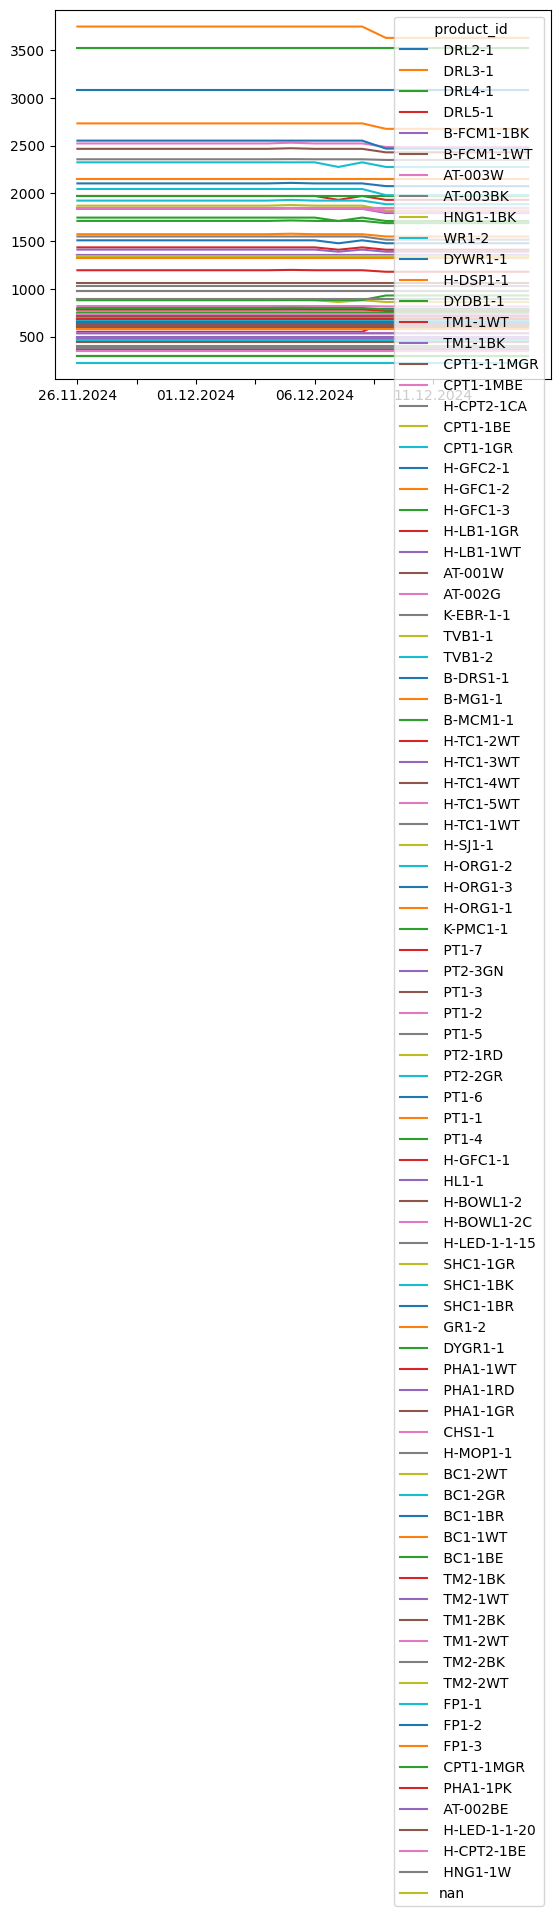

In [314]:
df[[' product_id'] + date_based_date_list].set_index(' product_id').T.map(map_price).plot()

In [327]:
df[' product_id'].iloc[15]

' CPT1-1-1MGR'